<a href="https://colab.research.google.com/github/fabnancyuhp/RENDUPYTHONISFSTAT/blob/master/exos_09_Fev_Vallade_Carpentier_Maignier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercice 3 chapitre 9 

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

data_credit=pd.read_pickle('/Users/jeremymaignier/Desktop/M2 280 ISF /SEMESTRE 2/Machine_learning/credit.pkl')
data_credit

for i in data_credit.index:
    if data_credit.loc[i,'A16']=='-':
        data_credit.loc[i,'A16']=0
        
    elif data_credit.loc[i,'A16']=='+':
        data_credit.loc[i,'A16']=1

data_credit.head()

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s,A16
0,30.83,0.000,1.25,1.0,202.0,0.0,0,1,0,1,...,0,1,0,1,1,0,1,0,0,1
1,58.67,4.460,3.04,6.0,43.0,560.0,1,0,0,1,...,0,1,0,1,1,0,1,0,0,1
2,24.50,0.500,1.50,0.0,280.0,824.0,1,0,0,1,...,0,1,1,0,1,0,1,0,0,1
3,27.83,1.540,3.75,5.0,100.0,3.0,0,1,0,1,...,0,1,0,1,0,1,1,0,0,1
4,20.17,5.625,1.71,0.0,120.0,0.0,0,1,0,1,...,0,1,1,0,1,0,0,0,1,1


#### Question 1

In [0]:
features=list(data_credit)
target=['A16'] #variable à expliquer
features=[o for o in features if o not in 'A16']

X=data_credit[features]
Y=data_credit[target]

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=2018)

from sklearn.preprocessing import StandardScaler
scal=StandardScaler()
scal.fit(X)

X_train_scal=scal.transform(X_train)
X_test_scal=scal.transform(X_test)

#### Question 2

In [0]:
from sklearn.neural_network import MLPClassifier
NN1=MLPClassifier(hidden_layer_sizes=(10,8),activation='logistic',solver='lbfgs',max_iter=500,random_state=2018)
NN1.fit(X_train_scal,Y_train.values.ravel())
Y_pred=NN1.predict(X_test_scal)
Y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

#### Question 3

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.8353658536585366

#### Question 4

In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,NN1.predict_proba(X_test_scal)[:,1])

0.8057172712345126

#### Question 5

In [0]:
NN2=MLPClassifier(hidden_layer_sizes=(10,5,8),activation='logistic',solver='lbfgs',random_state=2018)
NN2.fit(X_train_scal,Y_train.values.ravel())
Y_pred2=NN2.predict(X_test_scal)
Y_pred2

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

#### Question 6

In [0]:
accuracy_score(Y_test,Y_pred2)

0.8658536585365854

#### Question 7

In [0]:
roc_auc_score(Y_test,NN2.predict_proba(X_test_scal)[:,1])

0.8319152112255561

#### Question 8

Le paramètre solver permet de choisir l'algorithme d'optimisation utilisé pour obtenir les paramètres de biais et de poids optimaux. Il peut être notamment "Adam","SGD","lfbgs".

#### Question 9

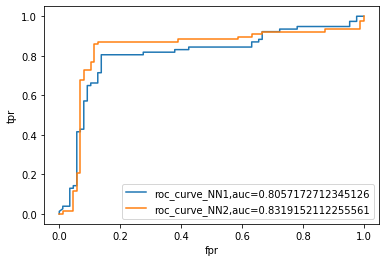

In [0]:
from sklearn.metrics import roc_curve,auc
fpr1,tpr1,threshold1=roc_curve(Y_test,NN1.predict_proba(X_test_scal)[:,1])
auc(fpr1,tpr1)
fpr2,tpr2,threshold2=roc_curve(Y_test,NN2.predict_proba(X_test_scal)[:,1])
auc(fpr2,tpr2)

plt.plot(fpr1,tpr1,label='roc_curve_NN1,auc='+str(auc(fpr1,tpr1)))
plt.plot(fpr2,tpr2,label='roc_curve_NN2,auc='+str(auc(fpr2,tpr2)))
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend(loc=0)
plt.show()

## Exercice 2.3 chapitre 10

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

data_insurance=pd.read_pickle('/Users/jeremymaignier/Desktop/M2 280 ISF /SEMESTRE 2/Machine_learning/insurance.pkl')
data_insurance

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


#### Question 1

In [0]:
features=list(data_insurance)
target=['charges']
features=[o for o in features if o not in 'charges']
X=data_insurance[features]
Y=data_insurance[target]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=2003)

from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(X)

X_train_scaled=scale.transform(X_train)
X_test_scaled=scale.transform(X_test)

#### Question 2

In [0]:
from sklearn.neural_network import MLPRegressor
NN1=MLPRegressor(hidden_layer_sizes=(10,10),activation='relu',max_iter=1000,solver='lbfgs',random_state=2000)
NN1.fit(X_train_scaled,Y_train.values.ravel())

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 10), learning_rate='constant',
             learning_rate_init=0.001, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=2000, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

#### Question 3

In [0]:
Y_predi=NN1.predict(X_test_scaled)
from sklearn.metrics import r2_score,mean_absolute_error
mae=mean_absolute_error(Y_test,Y_predi)
r2=r2_score(Y_test,Y_predi)
r2

0.8454365908531376

#### Question 4

 a ) Déterminer les poids du réseau de neurone NN1 allant du neurone 3 de la couche caché 1 à l’ensemble des neurones de la couche caché 2. (En python on commence en 0)

In [0]:
NN1.coefs_[0][2]

array([-4.54113984, -2.55968523, -1.2870831 ,  1.62009881,  7.41790886,
        2.55117961,  2.50221101,  4.73420555,  0.54094249, 11.90961391])

b) Déterminer le poids allant du neurone 3 de la couche cachée 1 au neurone 5 de la couche cachée 2.

In [0]:
NN1.coefs_[0][2][4]

7.417908859228222

c) Déterminer les biais de la couche caché 2. On utilisera la fonction intercepts_. On a des biais unique- ment dans les couches cachées

In [0]:
NN1.intercepts_[1]

array([  0.39299801, -49.79486878, -13.49535187,  -5.49393263,
        -2.01512331,  -4.84316086,  -4.95563854,  -1.52701719,
       -33.41629885,  -3.15758704])

d) Déterminer le biais du neurone 3 de la couche caché 1.

In [0]:
NN1.intercepts_[0][2]

-25.5629620622773

#### Question 5

In [0]:
Ni = 11
No = 1 
Ns = 1338*0.8
alpha=5

Nh = Ns/(alpha*(Ni+No))
Nh

17.84

#### Question 6 

In [0]:
from sklearn.model_selection import GridSearchCV
hiden = [(o,i) for o in range(11,20) for i in range(11,20)]
parameters={'hidden_layer_sizes':hiden}
NN2=MLPRegressor(activation='relu',max_iter=800,solver='lbfgs',random_state=2000)
clf=GridSearchCV(NN2,parameters,scoring='r2',cv=5)
clf.fit(X_train_scaled,Y_train.values.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_iter=800,
                                    momentum=0.9, n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_stat...
             param_grid={'hidden_layer_sizes': [(11, 11), (11, 12), (11, 13),
                                                (11, 14), (11, 15), (11, 16),
                                                (11, 17), (11, 18), (11, 19),
                                                (12, 11), (12, 12), (12, 13),
                

In [0]:
clf.best_score_

0.8243776133613975

In [0]:
clf.best_params_

{'hidden_layer_sizes': (11, 14)}

#### Question 7

In [0]:
NN_best=clf.best_estimator_
NN_best.fit(X_train_scaled,Y_train.values.ravel())

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(11, 14), learning_rate='constant',
             learning_rate_init=0.001, max_iter=800, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=2000, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

#### Question 8

In [0]:
from sklearn.metrics import r2_score
Y_predi2=NN_best.predict(X_test_scaled)
r2=r2_score(Y_test,Y_predi2)
r2

0.8386493103268688